In [38]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [39]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [40]:
len(X_train), len(X_test)

(60000, 10000)

In [41]:
X_train[0].shape

(28, 28)

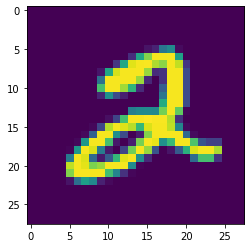

In [42]:
plt.imshow(X_train[5])

In [43]:
X_train = X_train / 255
x_test = X_test / 255

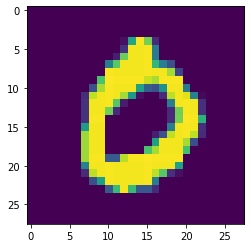

In [44]:
plt.imshow(X_test[3])

In [45]:
y_train[0:4]

array([5, 0, 4, 1], dtype=uint8)

In [46]:
X_train.shape

(60000, 28, 28)

In [47]:
# Flatten the image as 1d arrays
x_train_flattened = X_train.reshape(len(X_train), X_train.shape[1] * X_train.shape[2])
x_test_flattened = X_test.reshape(len(X_test), X_test.shape[1] * X_test.shape[2])

print(x_test_flattened.shape, x_train_flattened.shape)


(10000, 784) (60000, 784)


In [48]:
(x_test_flattened[0]).shape

(784,)

In [49]:
# model only 1 layer as input and output layer of 10 neurons
from keras.layers import Dense
from keras import Sequential

model = Sequential()
model.add(Dense(10, input_shape = (784,), activation= 'sigmoid'))

In [50]:
# compile
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']
)

In [52]:
# fit
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2491 - accuracy: 0.9311
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2473 - accuracy: 0.9317
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2463 - accuracy: 0.9320
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2455 - accuracy: 0.9311
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2438 - accuracy: 0.9326


In [54]:
# evaluate data on test data set
loss, accuracy = model.evaluate(x_test_flattened, y_test)
loss, accuracy

313/313 [==============================] - 0s 922us/step - loss: 66.4525 - accuracy: 0.8839


(66.45250701904297, 0.883899986743927)

In [59]:
y_predicted = model.predict(x_test_flattened)

In [62]:
y_predicted[0]

array([0., 0., 0., 1., 0., 0., 0., 1., 0., 1.], dtype=float32)

In [70]:
np.argmax(y_predicted[565])

4

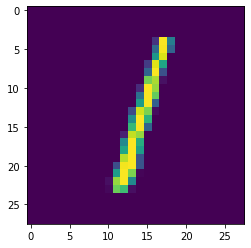

In [74]:
plt.imshow(x_test[2])

In [76]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[3, 2, 1, 0, 4]

In [77]:
# confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

Text(69.0, 0.5, 'truth')

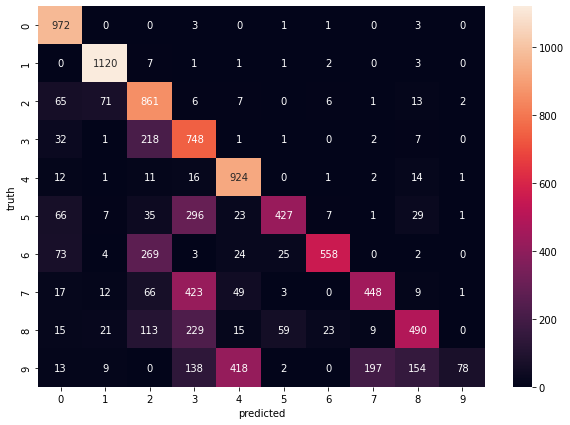

In [80]:
import seaborn as sn

plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [82]:
# model with hidden layer
model_h = Sequential()
model_h.add(Dense(100, input_shape=(784,), activation='relu'))
model_h.add(Dense(120, activation = 'tanh'))
model_h.add(Dense(10, activation = 'sigmoid'))

# compile
model_h.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']
)

model_h.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2273 - accuracy: 0.9321
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0945 - accuracy: 0.9705
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0673 - accuracy: 0.9782
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0513 - accuracy: 0.9834
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0385 - accuracy: 0.9873


In [84]:
loss, accuracy = model_h.evaluate(x_test_flattened, y_test)
loss, accuracy

313/313 [==============================] - 0s 1ms/step - loss: 0.1021 - accuracy: 0.9725


(0.10209448635578156, 0.9725000262260437)

In [87]:
y_predicted = model_h.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

Text(69.0, 0.5, 'truth')

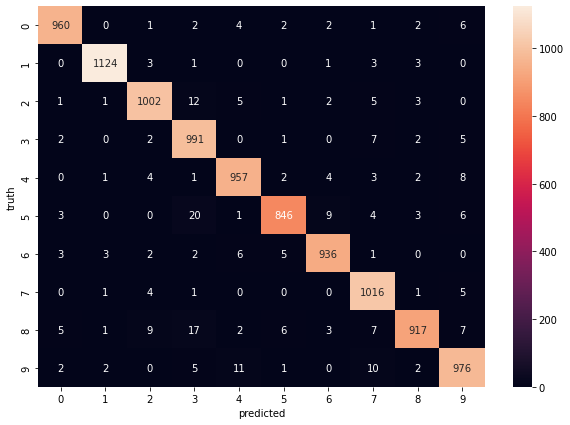

In [88]:
import seaborn as sn
# confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [96]:
# without faltten array
from keras.layers import Flatten
model_h = keras.Sequential()
model_h.add(Flatten(input_shape=(28,28)))
model_h.add(Dense(152, activation='relu'))
model_h.add(Dense(10, activation='sigmoid'))


# compile
model_h.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']
)

model_h.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2528 - accuracy: 0.9271
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1087 - accuracy: 0.9682
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0745 - accuracy: 0.9774
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0544 - accuracy: 0.9835
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0422 - accuracy: 0.9870
